# 02. LangGraph를 활용한 챗봇 구축

1. `StateGraph` 생성 - 챗봇의 구조를 "상태 기계(State Machine)"로 정의
2. `nodes`를 추가 - 챗봇이 호출할 수 있는 llm과 함수들을 나타내기
3. `edges`

In [2]:
from IPython.core.completer import TypedDict
from dotenv import load_dotenv
from langchain_openai import ChatOpenAI
from langchain_teddynote import logging
from sympy.physics.units import temperature

load_dotenv()
logging.langsmith("CH17-LangGraph")

LangSmith 추적을 시작합니다.
[프로젝트명]
CH17-LangGraph


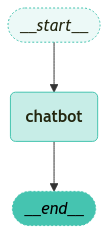

In [13]:
from langgraph.constants import END, START
# 1. 상태 정의
from langgraph.graph import add_messages, StateGraph
from typing import Annotated, TypedDict
from langchain_openai import ChatOpenAI


class State(TypedDict):
    messages: Annotated[list, add_messages]
    
# 2. 노드 정의
# llm
llm = ChatOpenAI(model="gpt-4o-mini", temperature=0)

# 챗봇 함수 정의
def chatbot(state: State):
    return {"messages": [llm.invoke(state["messages"])]}

# 3. 그래프 정의 노드 추가
graph_builder = StateGraph(State)
graph_builder.add_node("chatbot", chatbot)

# 4. 그래프 엣지 추가
graph_builder.add_edge(START, "chatbot")
graph_builder.add_edge("chatbot", END)

# 5. 그래프 컴파일
graph = graph_builder.compile()

# 6. 그래프 시각화
from langchain_teddynote.graphs import visualize_graph

# 그래프 시각화
visualize_graph(graph)

In [17]:
# 7. 그래프 실행

question = "서울의 유명한 맛집 TOP 10 추천해줘"

# 그래프 이벤트 스트리밍
for event in graph.stream({"messages": [("user", question)]}):
    # 이벤트 값 출력
    for value in event.values():
        print("Assistant:", value["messages"][-1].content)

Assistant: {'chatbot': {'messages': [AIMessage(content='서울에는 다양한 맛집이 많아서 선택하기가 어렵지만, 다음은 서울에서 유명한 맛집 TOP 10을 추천해 드립니다. 각 식당은 고유의 매력을 가지고 있으니 참고해 보세요!\n\n1. **광장시장** - 전통 시장으로, 빈대떡, 마약김밥, 떡볶이 등 다양한 길거리 음식을 즐길 수 있습니다.\n\n2. **이태원 부대찌개** - 부대찌개로 유명한 이곳은 푸짐한 양과 깊은 맛으로 많은 사랑을 받고 있습니다.\n\n3. **명동교자** - 칼국수와 만두가 유명한 곳으로, 항상 많은 사람들이 줄 서서 기다리는 인기 맛집입니다.\n\n4. **삼청동 수제비** - 수제비와 전통 한식을 즐길 수 있는 아늑한 분위기의 식당입니다.\n\n5. **한남동 소고기집** - 고급 한우를 맛볼 수 있는 곳으로, 고기 애호가들에게 추천합니다.\n\n6. **홍대 돈부리** - 일본식 덮밥 전문점으로, 다양한 토핑과 함께 맛있는 덮밥을 제공합니다.\n\n7. **압구정 로데오 거리의 카페** - 다양한 디저트와 커피를 즐길 수 있는 세련된 카페들이 많습니다.\n\n8. **신사동 가로수길의 브런치 카페** - 다양한 브런치 메뉴와 분위기 좋은 인테리어로 유명한 카페들이 많습니다.\n\n9. **종로의 전통 한정식** - 전통 한정식을 맛볼 수 있는 곳으로, 다양한 반찬과 함께 정갈한 한식을 제공합니다.\n\n10. **강남의 퓨전 한식 레스토랑** - 현대적인 감각으로 재해석한 한식을 제공하는 레스토랑들이 많아 새로운 맛을 경험할 수 있습니다.\n\n각 식당의 운영 시간이나 메뉴는 변동이 있을 수 있으니 방문 전에 확인해 보시는 것이 좋습니다. 맛있는 식사 되세요!', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 451, 'prompt_tokens': 19, 'total_